# Aug_16_Thu

In [6]:
%pylab
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Raspberry Pi 3 B

## Getting Started

Download Raspbian [here](https://www.raspberrypi.org/downloads/raspbian/). Unzip the image with `unzip`. Find the SD card you want to write to, and get its device path with `lsblk`. Lastly, write the image to the SD card with
```
sudo dd bs=4M if=2018-06-27-raspbian-stretch.img of=/dev/sdX status=progress conv=fsync
```

You can also unzip and write the file in one command with
```
unzip -p 2018-06-27-raspbian-stretch.zip | sudo dd bs=4M of=/dev/sdX conv=fsync
```

Run `sync` after the `dd` completes, unmount/eject the SD card, and insert it into the Raspberry Pi (while the power is OFF of course). Plug in the Pi and it should boot into Raspbian (after a few setup-related reboots).

### Setting up SSH
You'll probably want to set up SSH so you can log in to the Pi from your real computer. 

From the Pi, use `systemctl` to enable and start the `ssh` service
```
sudo systemctl enable ssh
sudo systemctl start ssh
```

Then find out the Pi's IP address with `lsblk`, or set up a hostname for it.

### Useful commands
CPU temperature
```
echo "temp=$(($(cat /sys/class/thermal/thermal_zone0/temp)/1000))'C"
```

GPU temperature
```
vcgencmd measure_temp
```

## GPIO Basics
A pinout diagram can be viewed by running `pinout` on the Pi (installed by default on Raspbian Desktop, not Lite).

Port Labels:
- __3V3__ 3.3V voltage source
- __5V__ 5V voltage source
- __GND__ ground, 0V
- __GPIOX__ general-purpose IO pins

### Lighting an LED
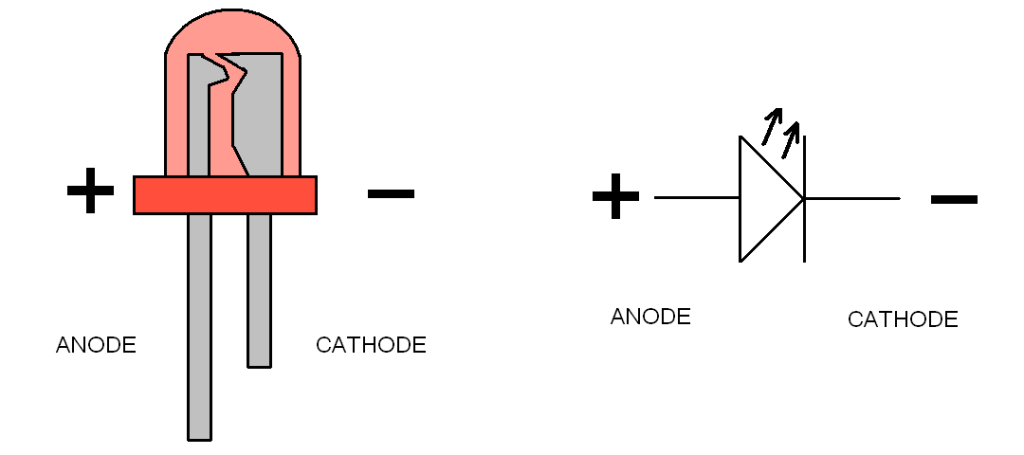

The classic electronics "Hello, World!". Connect an LED and a resistor (50+ ohms) between a 3V3 and a GND pin on the Pi. Remember, current flows from high to low voltage, so the anode gets connected to the 3V3 pin.